<a href="www.linkedin.com/in/AyhamMhd">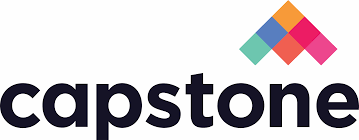</a>

<h1 align=center><font size = 5> Coursera Capstone, Stewart Foodservice Inc. in Beirut, Lebanon</font></h1>

# Preparing Environment 


### First importing prereqisites 

In [64]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import urllib.request

# Install bs4 to import BeautifulSoup
!conda install -c conda-forge bs4 --yes

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup
print('Prerequisit Packages were Loaded...')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Prerequisit Packages were Loaded...


### Exploring 

In [17]:
CLIENT_ID = 'My Foursquare ID' 
CLIENT_SECRET = 'Foursquare Secret' 
VERSION = '20180604'
LIMIT = 100
RADIUS = 2000

In [18]:
request_parameters = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "v": '20180605',
    "section": "restaurant",
    "near": "Beirut",
    "radius": RADIUS,
    "limit": LIMIT}

data = requests.get("https://api.foursquare.com/v2/venues/explore", params=request_parameters)

### Explore and cluster the neighborhoods in Beirut

#### Use geopy library to get the latitude and longitude values of Beirut City.

In [115]:
address = 'Beirut'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Beirut City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Beirut City are 33.8959203, 35.47843.


#### Create a map of Beirut with neighborhoods.

In [116]:
#Get the neighborhood's latitude and longitude values.

neighborhood_latitude = 33.8959203 # neighborhood latitude value
neighborhood_longitude = 35.47843 # neighborhood longitude value

neighborhood_name = 'Beirut' # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Beirut are 33.8959203, 35.47843.


#### Now, let's get the top 100 venues that are in Beirut within a radius of 500 meters.

In [181]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

In [118]:
#Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1613d7ea795307ab0b046d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Beirut',
  'headerFullLocation': 'Beirut',
  'headerLocationGranularity': 'city',
  'totalResults': 87,
  'suggestedBounds': {'ne': {'lat': 33.9004203045, 'lng': 35.48384123025315},
   'sw': {'lat': 33.8914202955, 'lng': 35.47301876974686}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c7f87334a03bfb72610cbd4',
       'name': 'Le Gustav',
       'location': {'address': 'Nehme Yafet St.',
        'crossStreet': 'Hamra Street',
        'lat': 33.89641,
        'lng': 35.479971,
        'labeledLatLngs': [{'label': 'display',
          'lat': 33.89641,
          'lng': 

In [119]:
#From Foursquare lab all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [120]:
#Now we are ready to clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name    categories        lat        lng
0     Le Gustav  Dessert Shop  33.896410  35.479971
1     Ferdinand           Pub  33.896492  35.478286
2  Ales & Tales     Gastropub  33.896797  35.478567
3   Moscow Mule           Bar  33.896835  35.478505
4     Li Beirut           Pub  33.896774  35.478787

In [121]:
# Let's discover the categories
nearby_venues.groupby(['categories']).count()

name  lat  lng
categories                               
Accessories Store             1    1    1
American Restaurant           2    2    2
Bakery                        1    1    1
Bar                           2    2    2
Bookstore                     1    1    1
Breakfast Spot                1    1    1
Burger Joint                  1    1    1
Café                          7    7    7
Clothing Store                2    2    2
Cocktail Bar                  2    2    2
Coffee Shop                   5    5    5
Cupcake Shop                  2    2    2
Dessert Shop                  4    4    4
Diner                         2    2    2
Fast Food Restaurant          2    2    2
French Restaurant             1    1    1
Gastropub                     1    1    1
Grocery Store                 1    1    1
Gym                           3    3    3
Gym / Fitness Center          1    1    1
Harbor / Marina               1    1    1
Hobby Shop                    1    1    1
Hotel                         2    2    2
Ice Cream Shop                1    1    1
Italian Restaurant            2    2    2
Lebanese Restaurant           4    4    4
Lounge                        1    1    1
Mediterranean Restaurant      1    1    1
Middle Eastern Restaurant     4    4    4
Other Nightlife               1    1    1
Pub                          12   12   12
Restaurant                    8    8    8
Sandwich Place                2    2    2
Supermarket                   1    1    1
Sushi Restaurant              1    1    1
Turkish Restaurant            2    2    2
Video Game Store              1    1    1

#### We want to filter results to match our target (Restaurants and etc)

In [122]:


nearby_venues = nearby_venues.loc[nearby_venues['categories'].str.contains('Restaurant') | nearby_venues['categories'].str.contains('Bar') | nearby_venues['categories'].str.contains('Sandwich') 
                          | nearby_venues['categories'].str.contains('Break') | nearby_venues['categories'].str.contains('Burger')| nearby_venues['categories'].str.contains('Caf')
                          | nearby_venues['categories'].str.contains('Coffee')| nearby_venues['categories'].str.contains('Diner')| nearby_venues['categories'].str.contains('Diner') ]


In [140]:
nearby_venues.head()

name                 categories        lat        lng
3            Moscow Mule                        Bar  33.896835  35.478505
5            Cafe Younes                       Café  33.895523  35.479906
6   Classic Burger Joint               Burger Joint  33.896285  35.477883
9         Roadster Diner                      Diner  33.896052  35.479539
10               Socrate  Middle Eastern Restaurant  33.897890  35.478478

In [123]:
#And how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

49 venues were returned by Foursquare.


##### Explore Neighborhoods

In [124]:

#Let's create a function to repeat the same process to all the neighborhoods in Beirut

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [125]:
#Run the above function on each neighborhood and create a new dataframe called t_venues

t_venues = getNearbyVenues(names=nearby_venues['name'],
                                   latitudes=nearby_venues['lat'],
                                   longitudes=nearby_venues['lng']
                                  )


Moscow Mule
Cafe Younes
Classic Burger Joint
Roadster Diner
Socrate
B.Hive
Beirut Hamra Street
Fiber
Deek Duke
Kalei Coffee - Ras Beirut
Bedivere Eatery & Tavern
Benihana
Appetito Trattoria
سندويش ونص Sandwich w Noss
Q.Hamra
Kalaa Chicken
T Marbouta
Zaatar W Zeit
Main Street
Barbar
Bagatelle
Universal Snack
L'Autre Bistro
Napolitana Hamra
Kaldi
Starbucks (ستاربكس)
Subway
goTango
Ka3kaya Cafe
Abu Naim Restaurant مطعم أبو نعيم
مطعم ابو حسّان
Captain's cabin
Abo Wasseem
Tasty Cafe
Abu Hassan
Beit Halab (بيت حلب)
Tche Tche
Caribou Coffee
Barjees Cafe
Mado
Burger King
THR3 0 NIN9
Dar Al Sultani
Al Kahwa
Starbucks (ستاربكس)
KB DÖNER
Toute (توت)
KFC
Ali's Nescafe/Tea Truck


In [145]:
# Also filter the neighbourhood
t_venues = t_venues.loc[t_venues['Venue Category'].str.contains('Restaurant') | t_venues['Venue Category'].str.contains('Bar') | t_venues['Venue Category'].str.contains('Sandwich') 
                          | t_venues['Venue Category'].str.contains('Break') | t_venues['Venue Category'].str.contains('Burger')| t_venues['Venue Category'].str.contains('Caf')
                          | t_venues['Venue Category'].str.contains('Coffee')| t_venues['Venue Category'].str.contains('Diner')| t_venues['Venue Category'].str.contains('Diner') ]

t_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
3  Moscow Mule              33.896835               35.478505   
5  Moscow Mule              33.896835               35.478505   
6  Moscow Mule              33.896835               35.478505   
7  Moscow Mule              33.896835               35.478505   
8  Moscow Mule              33.896835               35.478505   

                  Venue  Venue Latitude  Venue Longitude  \
3           Moscow Mule       33.896835        35.478505   
5           Cafe Younes       33.895523        35.479906   
6                 Fiber       33.898009        35.479450   
7  Classic Burger Joint       33.896285        35.477883   
8               Socrate       33.897890        35.478478   

              Venue Category  
3                        Bar  
5                       Café  
6                 Restaurant  
7               Burger Joint  
8  Middle Eastern Restaurant

In [161]:
t_venues.head(300)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
3             Moscow Mule              33.896835               35.478505   
5             Moscow Mule              33.896835               35.478505   
6             Moscow Mule              33.896835               35.478505   
7             Moscow Mule              33.896835               35.478505   
8             Moscow Mule              33.896835               35.478505   
11            Moscow Mule              33.896835               35.478505   
12            Moscow Mule              33.896835               35.478505   
13            Moscow Mule              33.896835               35.478505   
15            Moscow Mule              33.896835               35.478505   
16            Moscow Mule              33.896835               35.478505   
17            Moscow Mule              33.896835               35.478505   
21            Moscow Mule              33.896835               35.478505   
22            Moscow Mule              33.896835               35.478505   
24            Moscow Mule              33.896835               35.478505   
25            Moscow Mule              33.896835               35.478505   
26            Moscow Mule              33.896835               35.478505   
27            Moscow Mule              33.896835               35.478505   
29            Moscow Mule              33.896835               35.478505   
30            Moscow Mule              33.896835               35.478505   
31            Moscow Mule              33.896835               35.478505   
35            Moscow Mule              33.896835               35.478505   
36            Moscow Mule              33.896835               35.478505   
38            Moscow Mule              33.896835               35.478505   
41            Moscow Mule              33.896835               35.478505   
43            Moscow Mule              33.896835               35.478505   
45            Moscow Mule              33.896835               35.478505   
51            Moscow Mule              33.896835               35.478505   
52            Moscow Mule              33.896835               35.478505   
53            Moscow Mule              33.896835               35.478505   
54            Moscow Mule              33.896835               35.478505   
56            Moscow Mule              33.896835               35.478505   
57            Moscow Mule              33.896835               35.478505   
58            Moscow Mule              33.896835               35.478505   
59            Moscow Mule              33.896835               35.478505   
64            Moscow Mule              33.896835               35.478505   
66            Moscow Mule              33.896835               35.478505   
69            Moscow Mule              33.896835               35.478505   
70            Moscow Mule              33.896835               35.478505   
71            Moscow Mule              33.896835               35.478505   
72            Moscow Mule              33.896835               35.478505   
73            Moscow Mule              33.896835               35.478505   
75            Moscow Mule              33.896835               35.478505   
78            Moscow Mule              33.896835               35.478505   
79            Moscow Mule              33.896835               35.478505   
80            Moscow Mule              33.896835               35.478505   
82            Moscow Mule              33.896835               35.478505   
84            Moscow Mule              33.896835               35.478505   
86            Moscow Mule              33.896835               35.478505   
87            Moscow Mule              33.896835               35.478505   
89            Moscow Mule              33.896835               35.478505   
93            Cafe Younes              33.895523               35.479906   
96            Cafe Younes              33.895523             

In [146]:
#Let's check how many venues were returned for each neighborhood
t_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                               
Abo Wasseem                                           43   
Abu Hassan                                            29   
Abu Naim Restaurant مطعم أبو نعيم                     37   
Al Kahwa                                              56   
Ali's Nescafe/Tea Truck                               29   
Appetito Trattoria                                    48   
B.Hive                                                43   
Bagatelle                                             58   
Barbar                                                23   
Barjees Cafe                                          41   
Bedivere Eatery & Tavern                              56   
Beirut Hamra Street                                   55   
Beit Halab (بيت حلب)                                  25   
Benihana                                              34   
Burger King                                           55   
Cafe Younes                                           43   
Captain's cabin                                       39   
Caribou Coffee                                        25   
Classic Burger Joint                                  43   
Dar Al Sultani                                        36   
Deek Duke                                             57   
Fiber                                                 58   
KB DÖNER                                              51   
KFC                                                   54   
Ka3kaya Cafe                                          54   
Kalaa Chicken                                         27   
Kaldi                                                 60   
Kalei Coffee - Ras Beirut                             28   
L'Autre Bistro                                        57   
Mado                                                  41   
Main Street                                           52   
Moscow Mule                                           50   
Napolitana Hamra                                      55   
Q.Hamra                                               54   
Roadster Diner                                        58   
Socrate                                               47   
Starbucks (ستاربكس)                                   69   
Subway                                                50   
T Marbouta                                            52   
THR3 0 NIN9                                           57   
Tasty Cafe                                            57   
Tche Tche                                             42   
Toute (توت)                                           38   
Universal Snack                                       51   
Zaatar W Zeit                                         41   
goTango                                               28   
سندويش ونص Sandwich w Noss                            55   
مطعم ابو حسّان                                        24   

                                   Neighborhood Longitude  Venue  \
Neighborhood                                                       
Abo Wasseem                                            43     43   
Abu Hassan                                             29     29   
Abu Naim Restaurant مطعم أبو نعيم                      37     37   
Al Kahwa                                               56     56   
Ali's Nescafe/Tea Truck                                29     29   
Appetito Trattoria                                     48     48   
B.Hive                                                 43     43   
Bagatelle                                              58     58   
Barbar                                                 23     23   
Barjees Cafe                                           41     41   
Bedivere Eatery & Tavern                               56     56   
Beirut Hamra Street                                    55     55   
Beit Halab (بيت حلب)                                   25     25   
Benihana      

In [147]:
#Let's find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(t_venues['Venue Category'].unique())))

There are 24 uniques categories.


### Analyze Each Neighborhood

In [148]:
# one hot encoding
t_onehot = pd.get_dummies(t_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
t_onehot['Neighborhood'] = t_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [t_onehot.columns[-1]] + list(t_onehot.columns[:-1])
t_onehot = t_onehot[fixed_columns]

t_onehot.head()

Neighborhood  American Restaurant  Bar  Beach Bar  Bed & Breakfast  \
3  Moscow Mule                    0    1          0                0   
5  Moscow Mule                    0    0          0                0   
6  Moscow Mule                    0    0          0                0   
7  Moscow Mule                    0    0          0                0   
8  Moscow Mule                    0    0          0                0   

   Breakfast Spot  Burger Joint  Café  Chinese Restaurant  Cocktail Bar  \
3               0             0     0                   0             0   
5               0             0     1                   0             0   
6               0             0     0                   0             0   
7               0             1     0                   0             0   
8               0             0     0                   0             0   

   Coffee Shop  Diner  Eastern European Restaurant  Fast Food Restaurant  \
3            0      0                            0                     0   
5            0      0                            0                     0   
6            0      0                            0                     0   
7            0      0                            0                     0   
8            0      0                            0                     0   

   French Restaurant  Hookah Bar  Italian Restaurant  Juice Bar  \
3                  0           0                   0          0   
5                  0           0                   0          0   
6                  0           0                   0          0   
7                  0           0                   0          0   
8                  0           0                   0          0   

   Lebanese Restaurant  Mediterranean Restaurant  Middle Eastern Restaurant  \
3                    0                         0                          0   
5                    0                         0                          0   
6                    0                         0                          0   
7                    0                         0                          0   
8                    0                         0                          1   

   Restaurant  Sandwich Place  Sushi Restaurant  Turkish Restaurant  
3           0               0                 0                   0  
5           0               0                 0                   0  
6           1               0                 0                   0  
7           0               0                 0                   0  
8           0               0                 0                   0

In [149]:
#And let's examine the new dataframe size.
t_onehot.shape

(2185, 25)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [150]:

t_grouped = t_onehot.groupby('Neighborhood').mean().reset_index()
t_grouped


Neighborhood  American Restaurant       Bar  \
0                         Abo Wasseem             0.046512  0.046512   
1                          Abu Hassan             0.000000  0.034483   
2   Abu Naim Restaurant مطعم أبو نعيم             0.054054  0.027027   
3                            Al Kahwa             0.035714  0.053571   
4             Ali's Nescafe/Tea Truck             0.034483  0.068966   
5                  Appetito Trattoria             0.041667  0.041667   
6                              B.Hive             0.046512  0.046512   
7                           Bagatelle             0.034483  0.051724   
8                              Barbar             0.043478  0.000000   
9                        Barjees Cafe             0.048780  0.048780   
10           Bedivere Eatery & Tavern             0.035714  0.053571   
11                Beirut Hamra Street             0.036364  0.036364   
12               Beit Halab (بيت حلب)             0.080000  0.000000   
13                           Benihana             0.029412  0.058824   
14                        Burger King             0.036364  0.054545   
15                        Cafe Younes             0.046512  0.046512   
16                    Captain's cabin             0.051282  0.051282   
17                     Caribou Coffee             0.040000  0.040000   
18               Classic Burger Joint             0.046512  0.046512   
19                     Dar Al Sultani             0.027778  0.055556   
20                          Deek Duke             0.035088  0.052632   
21                              Fiber             0.034483  0.051724   
22                           KB DÖNER             0.039216  0.058824   
23                                KFC             0.037037  0.055556   
24                       Ka3kaya Cafe             0.037037  0.037037   
25                      Kalaa Chicken             0.037037  0.074074   
26                              Kaldi             0.033333  0.050000   
27          Kalei Coffee - Ras Beirut             0.035714  0.071429   
28                     L'Autre Bistro             0.035088  0.052632   
29                               Mado             0.048780  0.048780   
30                        Main Street             0.038462  0.019231   
31                        Moscow Mule             0.040000  0.040000   
32                   Napolitana Hamra             0.036364  0.036364   
33                            Q.Hamra             0.037037  0.037037   
34                     Roadster Diner             0.034483  0.051724   
35                            Socrate             0.042553  0.042553   
36                Starbucks (ستاربكس)             0.028986  0.014493   
37                             Subway             0.040000  0.040000   
38                         T Marbouta             0.038462  0.019231   
39                        THR3 0 NIN9             0.035088  0.052632   
40                         Tasty Cafe             0.035088  0.052632   
41                          Tche Tche             0.047619  0.047619   
42                        Toute (توت)             0.052632  0.052632   
43                    Universal Snack             0.039216  0.058824   
44                      Zaatar W Zeit             0.048780  0.048780   
45                            goTango             0.035714  0.071429   
46         سندويش ونص Sandwich w Noss             0.036364  0.054545   
47                     مطعم ابو حسّان             0.000000  0.083333   

    Beach Bar  Bed & Breakfast  Breakfast Spot  Burger Joint      Café  \
0    0.000000         0.000000        0.023256      0.023256  0.139535   
1    0.034483         0.000000        0.034483      0.034483  0.275862   
2    0.000000         0.000000        0.027027      0.027027  0.135135   
3    0.000000         0.017857        0.017857      0.017857  0.160714   
4    0.000000         0.000000        0.000000      0.034483  0.172414   
5    0.000000         0.000000        0.041667      

In [151]:
#Let's confirm the new size
t_grouped.shape

(48, 25)

#### Let's print each neighborhood along with the top 5 most common venues

In [152]:

num_top_venues = 5

for hood in t_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = t_grouped[t_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Abo Wasseem----
                       venue  freq
0                 Restaurant  0.16
1                       Café  0.14
2  Middle Eastern Restaurant  0.09
3                Coffee Shop  0.09
4        American Restaurant  0.05


----Abu Hassan----
                       venue  freq
0                       Café  0.28
1  Middle Eastern Restaurant  0.14
2                 Restaurant  0.10
3                Coffee Shop  0.10
4        Lebanese Restaurant  0.07


----Abu Naim Restaurant مطعم أبو نعيم----
                 venue  freq
0                 Café  0.14
1           Restaurant  0.11
2          Coffee Shop  0.11
3  Lebanese Restaurant  0.08
4       Sandwich Place  0.08


----Al Kahwa----
                       venue  freq
0                       Café  0.16
1                 Restaurant  0.14
2  Middle Eastern Restaurant  0.09
3             Sandwich Place  0.07
4                Coffee Shop  0.07


----Ali's Nescafe/Tea Truck----
                venue  freq
0                Café  0.17
1 

#### Let's put that into a pandas dataframe

In [153]:

#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)   
    return row_categories_sorted.index.values[0:num_top_venues]

In [154]:

#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [155]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = t_grouped['Neighborhood']

for ind in np.arange(t_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(t_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


Neighborhood 1st Most Common Venue  \
0                        Abo Wasseem            Restaurant   
1                         Abu Hassan                  Café   
2  Abu Naim Restaurant مطعم أبو نعيم                  Café   
3                           Al Kahwa                  Café   
4            Ali's Nescafe/Tea Truck                  Café   

       2nd Most Common Venue      3rd Most Common Venue 4th Most Common Venue  \
0                       Café  Middle Eastern Restaurant           Coffee Shop   
1  Middle Eastern Restaurant                Coffee Shop            Restaurant   
2                 Restaurant                Coffee Shop        Sandwich Place   
3                 Restaurant  Middle Eastern Restaurant        Sandwich Place   
4                 Restaurant         Italian Restaurant           Coffee Shop   

       5th Most Common Venue      6th Most Common Venue 7th Most Common Venue  \
0         Turkish Restaurant       Fast Food Restaurant                   Bar   
1        Lebanese Restaurant         Turkish Restaurant                   Bar   
2  Middle Eastern Restaurant        Lebanese Restaurant                 Diner   
3                Coffee Shop       Fast Food Restaurant                   Bar   
4                        Bar  Middle Eastern Restaurant   Lebanese Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0          Cocktail Bar                 Diner    American Restaurant  
1             Beach Bar        Breakfast Spot           Burger Joint  
2     French Restaurant          Cocktail Bar    American Restaurant  
3    Italian Restaurant                 Diner     Turkish Restaurant  
4    Turkish Restaurant      Sushi Restaurant           Burger Joint

### Cluster Neighborhoods

In [156]:
# set number of clusters
kclusters = 5

t_grouped_clustering = t_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(t_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 1, 4, 2, 0, 0, 4, 1, 0], dtype=int32)

In [157]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

t_merged = t_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
t_merged = t_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

t_merged.head() # check the last columns!

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
3  Moscow Mule              33.896835               35.478505   
5  Moscow Mule              33.896835               35.478505   
6  Moscow Mule              33.896835               35.478505   
7  Moscow Mule              33.896835               35.478505   
8  Moscow Mule              33.896835               35.478505   

                  Venue  Venue Latitude  Venue Longitude  \
3           Moscow Mule       33.896835        35.478505   
5           Cafe Younes       33.895523        35.479906   
6                 Fiber       33.898009        35.479450   
7  Classic Burger Joint       33.896285        35.477883   
8               Socrate       33.897890        35.478478   

              Venue Category  Cluster Labels 1st Most Common Venue  \
3                        Bar               0            Restaurant   
5                       Café               0            Restaurant   
6                 Restaurant               0            Restaurant   
7               Burger Joint               0            Restaurant   
8  Middle Eastern Restaurant               0            Restaurant   

  2nd Most Common Venue      3rd Most Common Venue 4th Most Common Venue  \
3                  Café  Middle Eastern Restaurant           Coffee Shop   
5                  Café  Middle Eastern Restaurant           Coffee Shop   
6                  Café  Middle Eastern Restaurant           Coffee Shop   
7                  Café  Middle Eastern Restaurant           Coffee Shop   
8                  Café  Middle Eastern Restaurant           Coffee Shop   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3        Sandwich Place  Fast Food Restaurant    Turkish Restaurant   
5        Sandwich Place  Fast Food Restaurant    Turkish Restaurant   
6        Sandwich Place  Fast Food Restaurant    Turkish Restaurant   
7        Sandwich Place  Fast Food Restaurant    Turkish Restaurant   
8        Sandwich Place  Fast Food Restaurant    Turkish Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
3      Sushi Restaurant                   Bar         Breakfast Spot  
5      Sushi Restaurant                   Bar         Breakfast Spot  
6      Sushi Restaurant                   Bar         Breakfast Spot  
7      Sushi Restaurant                   Bar         Breakfast Spot  
8      Sushi Restaurant                   Bar         Breakfast Spot

#### Finally, let's visualize the resulting clusters

In [178]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(t_merged['Venue Latitude'], t_merged['Venue Longitude'], t_merged['Neighborhood'], t_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [175]:
cluster0 = t_merged.loc[t_merged['Cluster Labels'] == 0]

In [165]:
t_merged.groupby(t_merged['Cluster Labels']).count()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
Cluster Labels                                                                
0                        835                    835                     835   
1                        534                    534                     534   
2                        133                    133                     133   
3                         29                     29                      29   
4                        654                    654                     654   

                Venue  Venue Latitude  Venue Longitude  Venue Category  \
Cluster Labels                                                           
0                 835             835              835             835   
1                 534             534              534             534   
2                 133             133              133             133   
3                  29              29               29              29   
4                 654             654              654             654   

                1st Most Common Venue  2nd Most Common Venue  \
Cluster Labels                                                 
0                                 835                    835   
1                                 534                    534   
2                                 133                    133   
3                                  29                     29   
4                                 654                    654   

                3rd Most Common Venue  4th Most Common Venue  \
Cluster Labels                                                 
0                                 835                    835   
1                                 534                    534   
2                                 133                    133   
3                                  29                     29   
4                                 654                    654   

                5th Most Common Venue  6th Most Common Venue  \
Cluster Labels                                                 
0                                 835                    835   
1                                 534                    534   
2                                 133                    133   
3                                  29                     29   
4                                 654                    654   

                7th Most Common Venue  8th Most Common Venue  \
Cluster Labels                                                 
0                                 835                    835   
1                                 534                    534   
2                                 133                    133   
3                                  29                     29   
4                                 654                    654   

                9th Most Common Venue  10th Most Common Venue  
Cluster Labels                                                 
0                                 835                     835  
1                                 534                     534  
2                                 133                     133  
3                                  29                      29  
4                                 654                     654

In [177]:
cluster0.shape

(835, 18)

### I will recommend Cluster zero to be the place where to create the POS, because more neighbourhoods it has. 

In [179]:
Lat = cluster0['Venue Latitude'].mean()
Lng = cluster0['Venue Longitude'].mean()
print('Latitude is {}, and Longitude is {}'.format(Lat, Lng))

Latitude is 33.89664370405219, and Longitude is 35.479637994214215


### Let's add a circle marker where suggested POS place

In [180]:
folium.CircleMarker(
    [Lat, Lng],
    radius=15,
    popup="Suggested POS Place!",
    color='green',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_clusters)
map_clusters

### That was Part3 of the Assignment, Thanks a lot!

Notebook created by: <a href = "www.linkedin.com/in/AyhamMhd">Ayham Mhd</a>

In [172]:
cluster0.head()

Neighborhood Latitude  Venue Longitude             Venue Category  \
3              33.896835        35.478505                        Bar   
5              33.896835        35.479906                       Café   
6              33.896835        35.479450                 Restaurant   
7              33.896835        35.477883               Burger Joint   
8              33.896835        35.478478  Middle Eastern Restaurant   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3               0            Restaurant                  Café   
5               0            Restaurant                  Café   
6               0            Restaurant                  Café   
7               0            Restaurant                  Café   
8               0            Restaurant                  Café   

       3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3  Middle Eastern Restaurant           Coffee Shop        Sandwich Place   
5  Middle Eastern Restaurant           Coffee Shop        Sandwich Place   
6  Middle Eastern Restaurant           Coffee Shop        Sandwich Place   
7  Middle Eastern Restaurant           Coffee Shop        Sandwich Place   
8  Middle Eastern Restaurant           Coffee Shop        Sandwich Place   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3  Fast Food Restaurant    Turkish Restaurant      Sushi Restaurant   
5  Fast Food Restaurant    Turkish Restaurant      Sushi Restaurant   
6  Fast Food Restaurant    Turkish Restaurant      Sushi Restaurant   
7  Fast Food Restaurant    Turkish Restaurant      Sushi Restaurant   
8  Fast Food Restaurant    Turkish Restaurant      Sushi Restaurant   

  9th Most Common Venue 10th Most Common Venue  
3                   Bar         Breakfast Spot  
5                   Bar         Breakfast Spot  
6                   Bar         Breakfast Spot  
7                   Bar         Breakfast Spot  
8                   Bar         Breakfast Spot